In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


Please have the dataset file in your Drive in the MyDrive folder in the original name ,i.e., 'extended_salary_data.csv'.

In [49]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/extended_salary_data.csv', 'r') as file:
  DATA=pd.read_csv(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


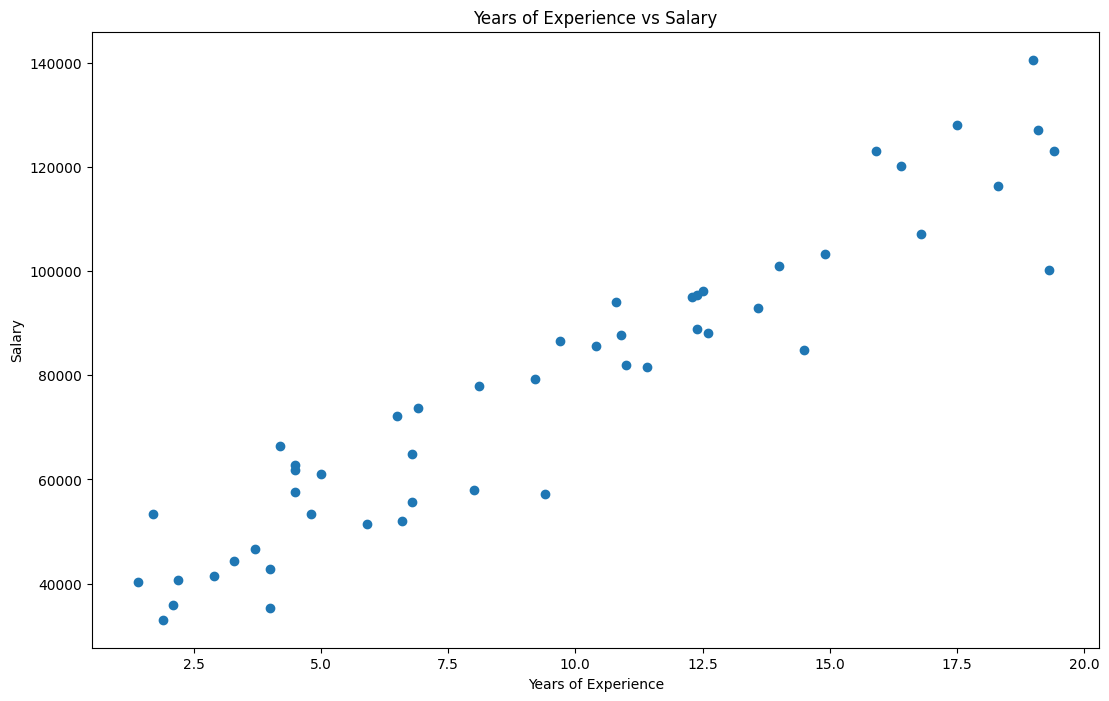

In [50]:
plt.figure(figsize=(13,8))
plt.scatter(DATA['YearsExperience'],DATA['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [51]:
Mean_DATA=DATA.mean()
Median_DATA=DATA.median()
Variance_DATA=DATA.var()
STD_DATA=DATA.std()
print("Mean\n",Mean_DATA)
print("\nMedian\n",Median_DATA)
print("\nVariance\n",Variance_DATA)
print("\nStandard Deviation\n",STD_DATA)

Mean
 YearsExperience        9.4800
Salary             77370.5474
dtype: float64

Median
 YearsExperience        9.30
Salary             78598.65
dtype: float64

Variance
 YearsExperience    3.009061e+01
Salary             8.008291e+08
dtype: float64

Standard Deviation
 YearsExperience        5.485491
Salary             28298.924420
dtype: float64


In [52]:
X_train, X_test, y_train, y_test = train_test_split( DATA['YearsExperience'],DATA['Salary'], train_size = 0.7, test_size = 0.3, random_state = 100 )

In [53]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print("Slope:",lr.params.YearsExperience)
print("Intercept:",lr.params.const)

Slope: 4825.62236895921
Intercept: 31064.7208258222


In [54]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [55]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
print( "MAE: ",mean_absolute_error( y_test, y_pred ))
print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  7210.3363729365665
MAE:  5646.907918532531
R-squared:  0.9443457450976346
